In [1]:
import pandas as pd
import numpy as np 


In [2]:
data=pd.read_excel("C:\\Users\\SAMEER\\Downloads\\project3 (1) (1).xlsx")

# 1
data.head()

,Bounces,Exits,Continent,Sourcegroup,Timeinpage,Uniquepageviews,Visits,BouncesNew
0,0,0,OC,(direct),18,1,0,0.0
1,0,0,N.America,(direct),4,1,0,0.0
2,0,0,N.America,Others,35,1,0,0.0
3,0,0,N.America,public.tableausoftware.com,70,1,0,0.0
4,0,0,N.America,public.tableausoftware.com,81,1,0,0.0


In [3]:
data.columns


Index(['Bounces', 'Exits', 'Continent', 'Sourcegroup', 'Timeinpage',
       'Uniquepageviews', 'Visits', 'BouncesNew'],
      dtype='object')

In [4]:
data.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32109 entries, 0 to 32108
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bounces          32109 non-null  int64  
 1   Exits            32109 non-null  int64  
 2   Continent        32109 non-null  object 
 3   Sourcegroup      32109 non-null  object 
 4   Timeinpage       32109 non-null  int64  
 5   Uniquepageviews  32109 non-null  int64  
 6   Visits           32109 non-null  int64  
 7   BouncesNew       32109 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.0+ MB


In [5]:
print(data.describe()) 

            Bounces         Exits    Timeinpage  Uniquepageviews   
count  32109.000000  32109.000000  32109.000000     32109.000000  \
mean       0.713009      0.906039     73.184746         1.114329   
std        0.708215      0.695819    394.441111         0.614880   
min        0.000000      0.000000      0.000000         1.000000   
25%        0.000000      1.000000      0.000000         1.000000   
50%        1.000000      1.000000      0.000000         1.000000   
75%        1.000000      1.000000     10.000000         1.000000   
max       30.000000     36.000000  46745.000000        45.000000   

             Visits    BouncesNew  
count  32109.000000  32109.000000  
mean       0.906039      0.007130  
std        0.730068      0.007082  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.010000  
75%        1.000000      0.010000  
max       45.000000      0.300000  


In [6]:
print(data.isnull().sum())


Bounces            0
Exits              0
Continent          0
Sourcegroup        0
Timeinpage         0
Uniquepageviews    0
Visits             0
BouncesNew         0
dtype: int64


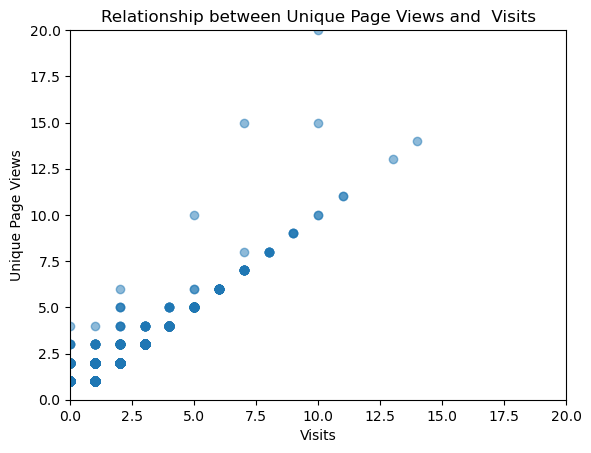

In [7]:
# 2
import matplotlib.pyplot as plt


plt.scatter(data["Visits"], data['Uniquepageviews'],alpha=[0.5])

plt.title('Relationship between Unique Page Views and  Visits')
plt.xlabel('Visits')


plt.xlim(0, 20)
plt.ylim(0,20)

plt.ylabel('Unique Page Views')
plt.show()


In [8]:
correlation = data['Visits'].corr(data['Uniquepageviews'])
print(f"Correlation between visits and unique page views: {correlation}")

Correlation between visits and unique page views: 0.8144457070735212


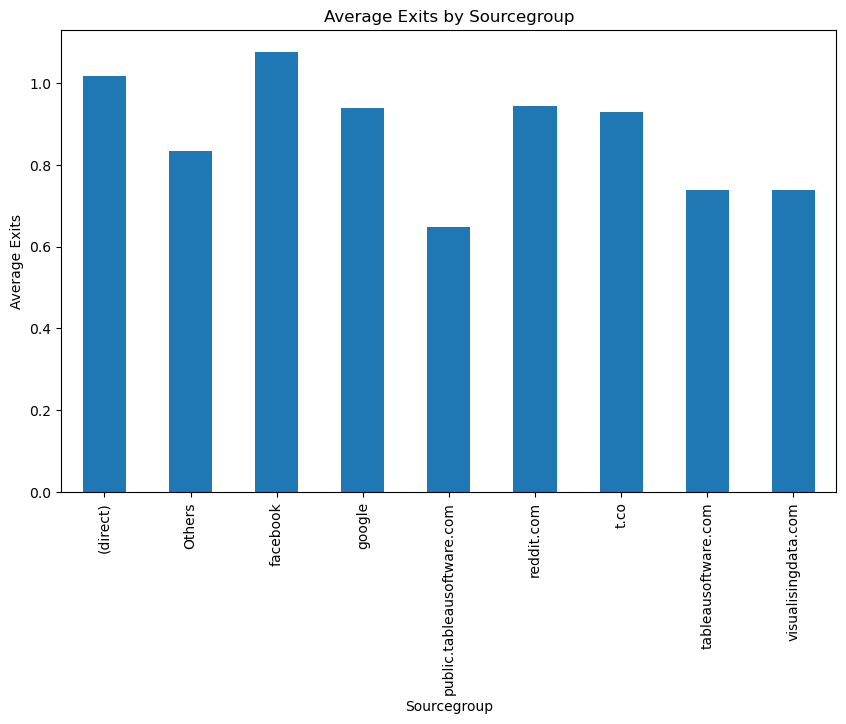

In [9]:
# Exits by Sourcegroup (Bar plot)

plt.figure(figsize=(10, 6))
data.groupby('Sourcegroup')['Exits'].mean().plot(kind='bar')
plt.title('Average Exits by Sourcegroup')
plt.xlabel('Sourcegroup')
plt.ylabel('Average Exits')
plt.show()


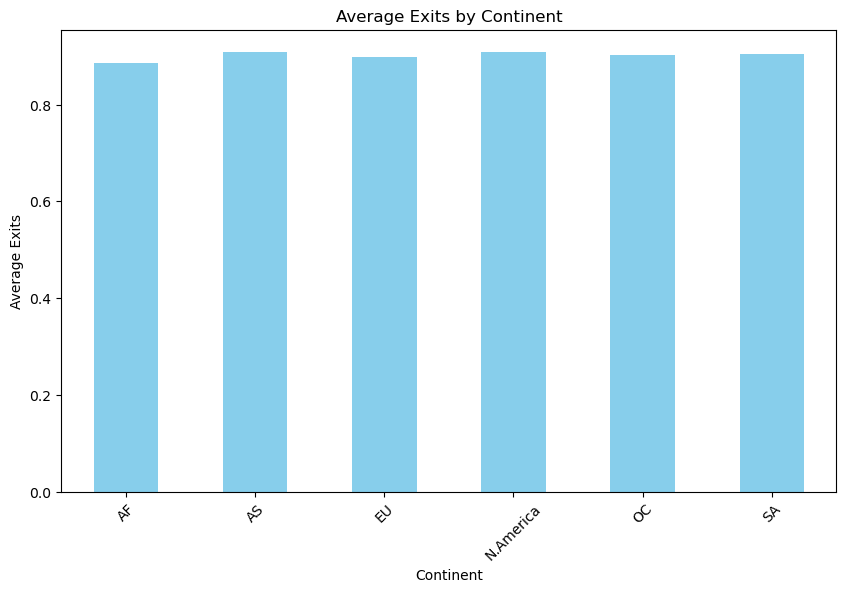

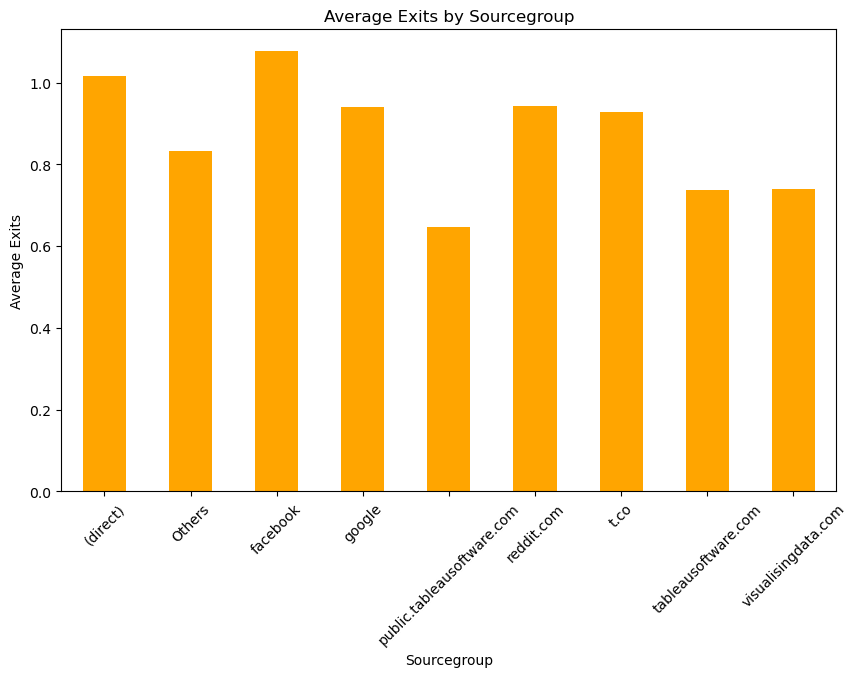

In [11]:
# Exits by Continent (Bar plot)
plt.figure(figsize=(10, 6))
# Group by Continent and calculate the mean of Exits
data.groupby('Continent')['Exits'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Exits by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Exits')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

# Exits by Sourcegroup (Bar plot)
plt.figure(figsize=(10, 6))
# Group by Sourcegroup and calculate the mean of Exits
data.groupby('Sourcegroup')['Exits'].mean().plot(kind='bar', color='orange')
plt.title('Average Exits by Sourcegroup')
plt.xlabel('Sourcegroup')
plt.ylabel('Average Exits')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()



plt.figure(figsize=(10, 6))
data.boxplot(column='Timeinpage', by='Continent', patch_artist=True)
plt.title('Time on Page by Continent')
plt.suptitle('')
plt.xlabel('Continent')
plt.ylabel('Time on Page')
plt.show()

plt.figure(figsize=(10, 6))
data.boxplot(column='Timeinpage', by='Sourcegroup', patch_artist=True)
plt.title('Time on Page by Sourcegroup')
plt.suptitle('')
plt.xlabel('Sourcegroup')
plt.ylabel('Time on Page')
plt.show()

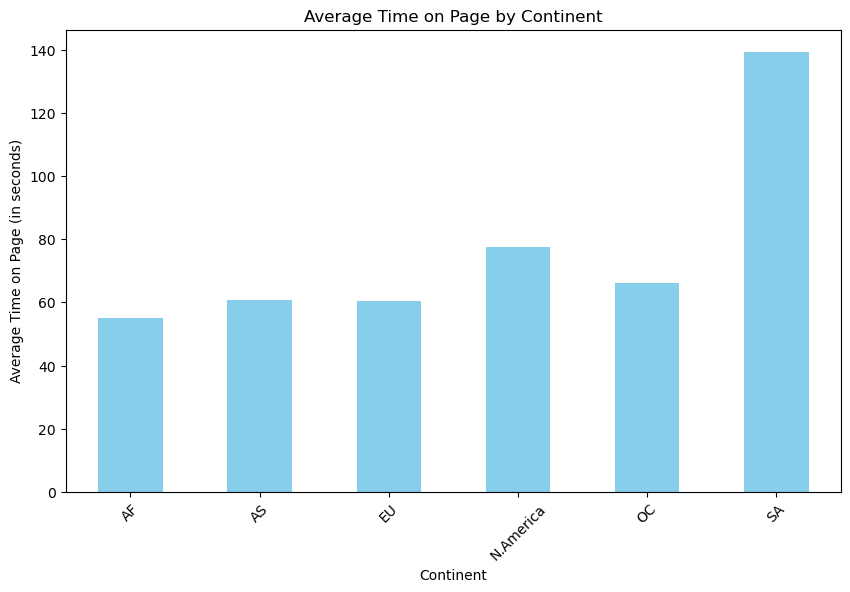

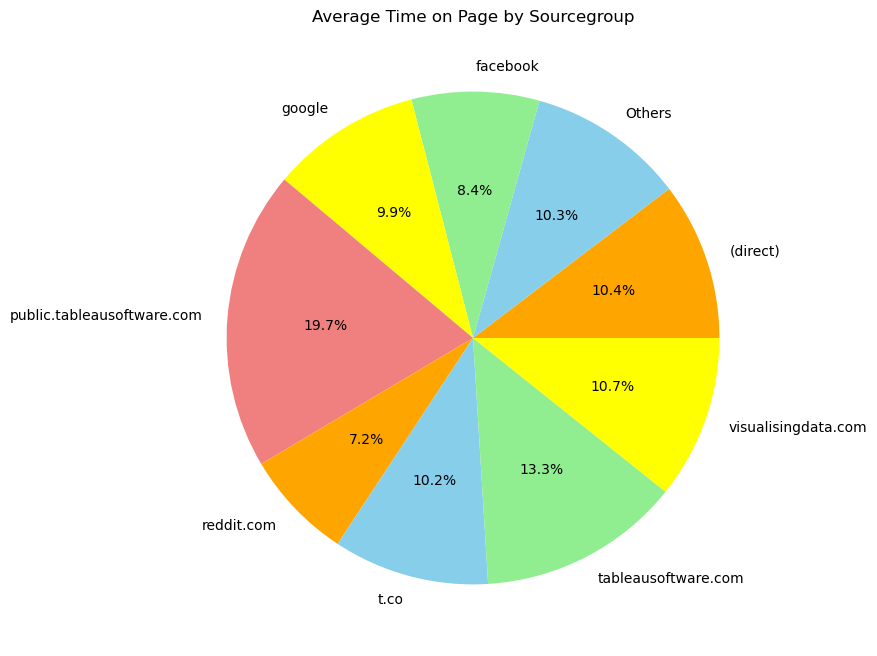

In [18]:

# Time on Page by Continent (Bar plot)
plt.figure(figsize=(10, 6))
# Group by Continent and calculate the mean of Timeinpage
data.groupby('Continent')['Timeinpage'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Time on Page by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Time on Page (in seconds)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


# Time on Page by Sourcegroup (Pie chart)
plt.figure(figsize=(8, 8))
sourcegroup_avg_time = data.groupby('Sourcegroup')['Timeinpage'].mean()

sourcegroup_avg_time.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'skyblue', 'lightgreen', 'yellow', 'lightcoral'])
plt.title('Average Time on Page by Sourcegroup')
plt.ylabel('')  
plt.show()


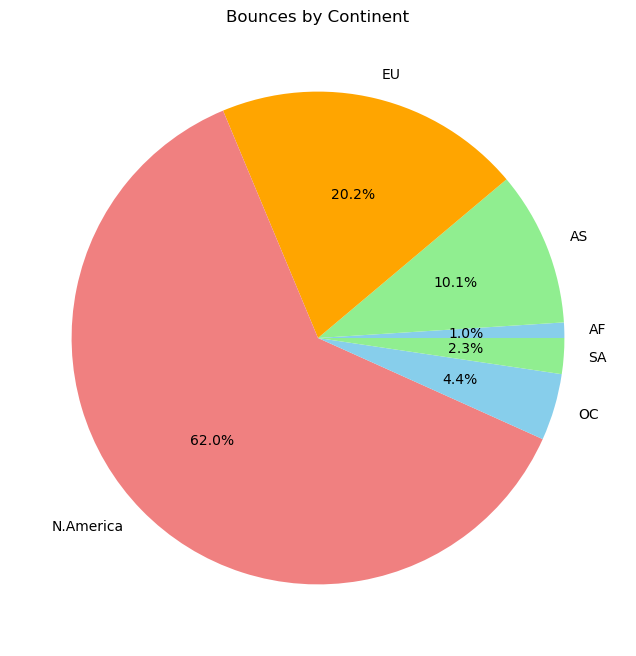

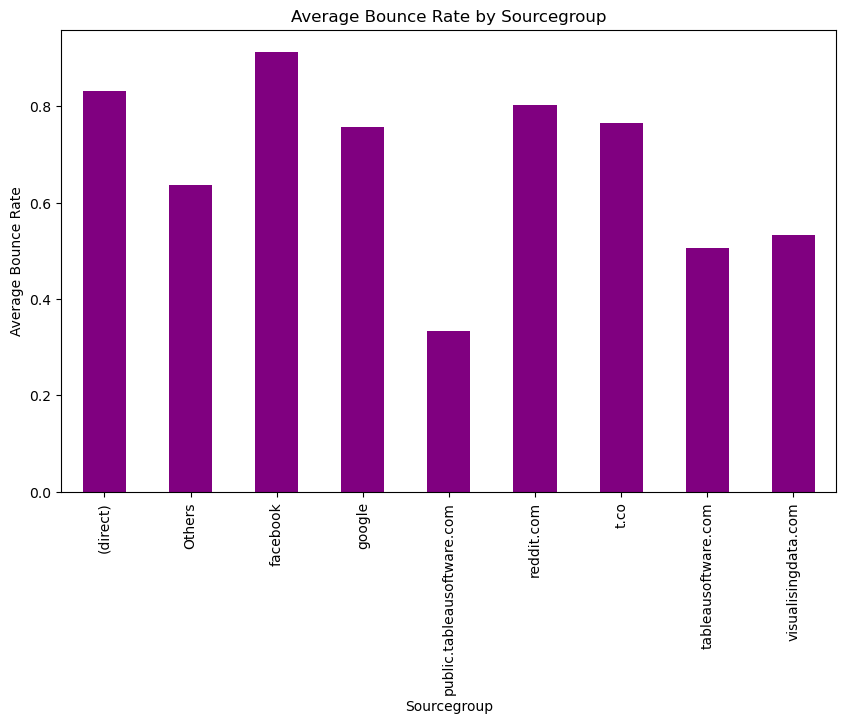

In [19]:
# Bounces by Continent (Pie chart)
plt.figure(figsize=(8, 8))
# Group by Continent and calculate the sum of Bounces (you can use mean if preferred)
continent_bounces = data.groupby('Continent')['Bounces'].sum()

# Plot the pie chart
continent_bounces.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Bounces by Continent')
plt.ylabel('')  # Hide the y-label
plt.show()


# Bounces by Sourcegroup (Bar plot)
plt.figure(figsize=(10, 6))
data.groupby('Sourcegroup')['Bounces'].mean().plot(kind='bar', color='purple')
plt.title('Average Bounce Rate by Sourcegroup')
plt.xlabel('Sourcegroup')
plt.ylabel('Average Bounce Rate')
plt.show()
